In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/electric-motor-temperature/measures_v2.csv


![1](https://arabam-blog.mncdn.com/wp-content/uploads/2022/10/iStock-1497778396.jpg)

# Electirc Motor Temperature Verisetinin İncelemesi

In [2]:
import numpy as np    #Sayısal hesaplamalar ve veri manipülasyonu için kullanılır.
                      #Diziler ve çok boyutlu dizilerle çalışmayı kolaylaştırır.
                      #Hızlı ve verimli vektör operasyonları ve çeşitli matematiksel fonksiyonlar sağlar.

import pandas as pd   #Veri okuma, temizleme, analiz etme ve işleme için kullanılır.


import seaborn as sns #İstatistiksel veri görselleştirmeleri yapar. Matplotlib üzerine kuruludur.
                      #Gelişmiş ve estetik grafikleri oluşturmanızı sağlar.
                      #Veri dağılımını, ilişkilerini ve kategorik verileri gösteren grafikler oluşturmak için kullanılır.

import matplotlib.pyplot as plt #Temel ve esnek veri görselleştirmeleri yapar.

In [3]:
df=pd.read_csv("/kaggle/input/electric-motor-temperature/measures_v2.csv") #Verisetinin okunması

# 1. Veri Analizi

In [4]:
df.info() #Veriseti hakkında bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


# *Veriseti hakkında

u_q : Voltaj q-bileşeni ölçümü dq-koordinatlarında (V cinsinden) </br>
coolant : Soğutucu sıcaklığı (°C cinsinden) </br>
stator_winding : Stator sargı sıcaklığı (°C cinsinden) termokupllarla ölçülmüştür </br>
u_d : Voltaj d-bileşeni ölçümü dq-koordinatlarında </br>
stator_tooth : Stator diş sıcaklığı (°C cinsinden) termokupllarla ölçülmüştür </br>
motor_speed : Motor hızı (dev/dak cinsinden) </br>
i_d : Mevcut d-bileşeni ölçümü dq-koordinatlarında </br>
i_q : Mevcut q-bileşeni ölçümü dq-koordinatlarında </br>
pm : Kalıcı mıknatıs sıcaklığı (°C cinsinden) termokupllarla ölçülmüştür ve bir termografi ünitesi aracılığıyla kablosuz olarak iletilmiştir. </br>
stator_yoke : Stator boyunduruğu sıcaklığı (°C cinsinden) termokupllarla ölçülmüştür </br>
ambient : Ortam </br>
torque : Tork </br>
profile_id : Id </br>
profile_id

In [5]:
#Verisetinde ki sütunların yeniden adlandırılması
df.columns=["voltaj_q_bileseni","sogutma_suyu_sicakligi","stator_sargi_sicakligi","voltaj_d_bileseni","stator_dis_sicakligi","motor_hizi","mevcut_d_bileseni","mevcut_q_bileseni","miknatis_sicakligi","stator_boyundurugu_sicakligi","ortam","tork","Id"]

In [6]:
df.info() #Yeniden adlandırılan veriseti hakkında

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   voltaj_q_bileseni             1330816 non-null  float64
 1   sogutma_suyu_sicakligi        1330816 non-null  float64
 2   stator_sargi_sicakligi        1330816 non-null  float64
 3   voltaj_d_bileseni             1330816 non-null  float64
 4   stator_dis_sicakligi          1330816 non-null  float64
 5   motor_hizi                    1330816 non-null  float64
 6   mevcut_d_bileseni             1330816 non-null  float64
 7   mevcut_q_bileseni             1330816 non-null  float64
 8   miknatis_sicakligi            1330816 non-null  float64
 9   stator_boyundurugu_sicakligi  1330816 non-null  float64
 10  ortam                         1330816 non-null  float64
 11  tork                          1330816 non-null  float64
 12  Id                          

In [7]:
df.isnull().sum() #Verisetinde null değer kontrolünün yapılması

voltaj_q_bileseni               0
sogutma_suyu_sicakligi          0
stator_sargi_sicakligi          0
voltaj_d_bileseni               0
stator_dis_sicakligi            0
motor_hizi                      0
mevcut_d_bileseni               0
mevcut_q_bileseni               0
miknatis_sicakligi              0
stator_boyundurugu_sicakligi    0
ortam                           0
tork                            0
Id                              0
dtype: int64

In [8]:
print(df.columns) #Verisetinde bulunan sütunların listelenmesi
print("Toplam sütun sayısı: ",len(df.columns)) #Toplam sütun sayısını verir

Index(['voltaj_q_bileseni', 'sogutma_suyu_sicakligi', 'stator_sargi_sicakligi',
       'voltaj_d_bileseni', 'stator_dis_sicakligi', 'motor_hizi',
       'mevcut_d_bileseni', 'mevcut_q_bileseni', 'miknatis_sicakligi',
       'stator_boyundurugu_sicakligi', 'ortam', 'tork', 'Id'],
      dtype='object')
Toplam sütun sayısı:  13


In [9]:
df.describe() #Verisetinde ki ortalama, standart sapma vb. değerlerin gösterilmesi

,voltaj_q_bileseni,sogutma_suyu_sicakligi,stator_sargi_sicakligi,voltaj_d_bileseni,stator_dis_sicakligi,motor_hizi,mevcut_d_bileseni,mevcut_q_bileseni,miknatis_sicakligi,stator_boyundurugu_sicakligi,ortam,tork,Id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


# * NaN Değerlerin Eklenmesi

In [10]:
# Verisetinin boyutunun kopyalanması ve rastgele NaN değer eklenmesi için gerekli değişkenlerin tanımlanması
df_missing = df.copy()
df_size = df.size
missing_rate = 0.05
num_missing = int(df_size * missing_rate)

# Rastgele NaN değer ekleme
for _ in range(num_missing):
    row_idx = np.random.randint(0, df.shape[0])
    col_idx = np.random.randint(0, df.shape[1])
    df_missing.iat[row_idx, col_idx] = np.nan

#Eklenen Nan değerlerin gösterilmesi
print("\nNaN değerlerinin eklendiği veri:")
print(df_missing.isna().sum())


NaN değerlerinin eklendiği veri:
voltaj_q_bileseni               64450
sogutma_suyu_sicakligi          64875
stator_sargi_sicakligi          64898
voltaj_d_bileseni               65090
stator_dis_sicakligi            64793
motor_hizi                      64871
mevcut_d_bileseni               64753
mevcut_q_bileseni               65346
miknatis_sicakligi              65282
stator_boyundurugu_sicakligi    64968
ortam                           64853
tork                            64917
Id                              64657
dtype: int64


# * NaN Değerleri Eklenen Verisetinde Ön İşleme 

In [11]:
dataFrame=df_missing.dropna() #NaN değerler silindi

In [12]:
dataFrame.isnull().sum() #NaN değerlerin kontrolü

voltaj_q_bileseni               0
sogutma_suyu_sicakligi          0
stator_sargi_sicakligi          0
voltaj_d_bileseni               0
stator_dis_sicakligi            0
motor_hizi                      0
mevcut_d_bileseni               0
mevcut_q_bileseni               0
miknatis_sicakligi              0
stator_boyundurugu_sicakligi    0
ortam                           0
tork                            0
Id                              0
dtype: int64

# 2. Veri Görselleştirme

# * Korelasyon İlişkisi

<Axes: >

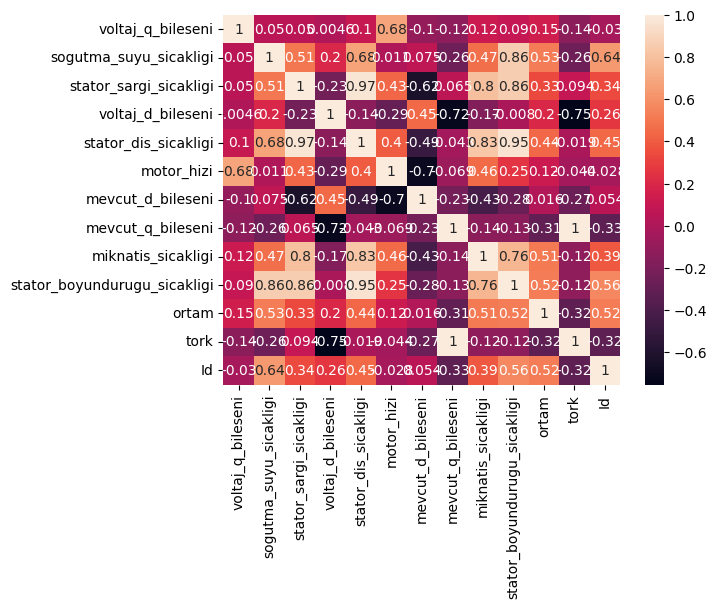

In [13]:
sns.heatmap(dataFrame.corr(),annot=True)

In [14]:
dataFrame.corr() #Korelasyon ilişkisini net görüntülemek için tablo halinde görüntüleme

,voltaj_q_bileseni,sogutma_suyu_sicakligi,stator_sargi_sicakligi,voltaj_d_bileseni,stator_dis_sicakligi,motor_hizi,mevcut_d_bileseni,mevcut_q_bileseni,miknatis_sicakligi,stator_boyundurugu_sicakligi,ortam,tork,Id
voltaj_q_bileseni,1.000000,0.050040,0.050056,0.004580,0.103450,0.683309,-0.100550,-0.124863,0.122093,0.089629,0.149689,-0.136443,-0.030429
sogutma_suyu_sicakligi,0.050040,1.000000,0.505504,0.195530,0.675539,0.011065,0.074659,-0.256842,0.467914,0.861089,0.527138,-0.258367,0.636035
stator_sargi_sicakligi,0.050056,0.505504,1.000000,-0.234982,0.970144,0.431814,-0.624005,0.064512,0.796109,0.860346,0.333517,0.094431,0.341031
voltaj_d_bileseni,0.004580,0.195530,-0.234982,1.000000,-0.142655,-0.289364,0.448834,-0.722868,-0.171890,-0.008019,0.204043,-0.753667,0.263489
stator_dis_sicakligi,0.103450,0.675539,0.970144,-0.142655,1.000000,0.397845,-0.486629,-0.043278,0.832300,0.953153,0.443886,-0.019368,0.451289
motor_hizi,0.683309,0.011065,0.431814,-0.289364,0.397845,1.000000,-0.701131,-0.068852,0.458543,0.254906,0.117838,-0.043724,-0.028466
mevcut_d_bileseni,-0.100550,0.074659,-0.624005,0.448834,-0.486629,-0.701131,1.000000,-0.230564,-0.427595,-0.277617,0.015724,-0.273441,0.053525
mevcut_q_bileseni,-0.124863,-0.256842,0.064512,-0.722868,-0.043278,-0.068852,-0.230564,1.000000,-0.142619,-0.132276,-0.314156,0.996435,-0.325318
miknatis_sicakligi,0.122093,0.467914,0.796109,-0.171890,0.832300,0.458543,-0.427595,-0.142619,1.000000,0.756975,0.513544,-0.117352,0.386885
stator_boyundurugu_sicakligi,0.089629,0.861089,0.860346,-0.008019,0.953153,0.254906,-0.277617,-0.132276,0.756975,1.000000,0.521030,-0.117890,0.563788


Aralarında Korelasyon İlişkisi bulunan sütunlar tabloda verilmiştir.
Bunlar;

**Güçlü Pozitif İlişkiler:** </br></br>
stator_sargi_sicakligi ve stator_dis_sicakligi: Korelasyon değeri 0.970. Bu, iki değişkenin çok güçlü bir şekilde pozitif ilişkili olduğunu gösterir. Yani, birinin artması diğerinin de artmasına yol açıyor. </br>

stator_boyundurugu_sicakligi ve sogutma_suyu_sicakligi: Korelasyon değeri 0.860. Bu, iki değişken arasında güçlü bir pozitif ilişki olduğunu gösteriyor. </br>

miknatis_sicakligi ve stator_boyundurugu_sicakligi: Korelasyon değeri 0.756. Bu da önemli bir pozitif ilişkiyi işaret eder. </br>

stator_boyundurugu_sicakligi ve ortam: Korelasyon değeri 0.520. Bu da orta seviyede bir pozitif ilişki olduğunu gösteriyor. </br>

mevcut_q_bileseni ve tork: Korelasyon değeri 0.996. Bu iki değişken arasında çok güçlü bir pozitif ilişki vardır; birinin değeri arttıkça diğeri de artıyor. </br>

miknatis_sicakligi ve ortam: Korelasyon değeri 0.513. Bu, orta derecede pozitif bir ilişkiyi gösteriyor. </br>

voltaj_q_bileseni ve motor_hizi: Korelasyon değeri 0.683. Bu, orta güçlü bir pozitif ilişki olduğunu işaret eder. </br></br>

**Güçlü Negatif İlişkiler:** </br></br>
voltaj_d_bileseni ve mevcut_q_bileseni: Korelasyon değeri -0.723. Bu, güçlü bir negatif ilişkiyi işaret eder; birinin artması, diğerinin azalmasına neden olabilir. </br>

voltaj_d_bileseni ve tork: Korelasyon değeri -0.754. Bu da çok güçlü bir negatif ilişkiyi gösterir; voltajın artması torku azaltabilir. </br>

motor_hizi ve mevcut_d_bileseni: Korelasyon değeri -0.701. Bu da güçlü bir negatif ilişkiyi işaret eder. </br>

mevcut_q_bileseni ve mevcut_d_bileseni: Korelasyon değeri -0.426. Orta düzeyde bir negatif ilişki var; birinin artması diğerinin azalmasına yol açabilir. </br></br>

**Sonuç:** </br></br>
Çok güçlü pozitif ilişkiler: mevcut_q_bileseni ile tork arasındaki ilişki ve stator_sargi_sicakligi ile stator_dis_sicakligi arasındaki ilişki. </br>
Çok güçlü negatif ilişkiler: voltaj_d_bileseni ile tork arasındaki ilişki ve voltaj_d_bileseni ile mevcut_q_bileseni arasındaki ilişki. </br>

# * Stator Sargı Sıcaklığı-Histplot Grafiği

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Stator Sargı Sıcaklığı')

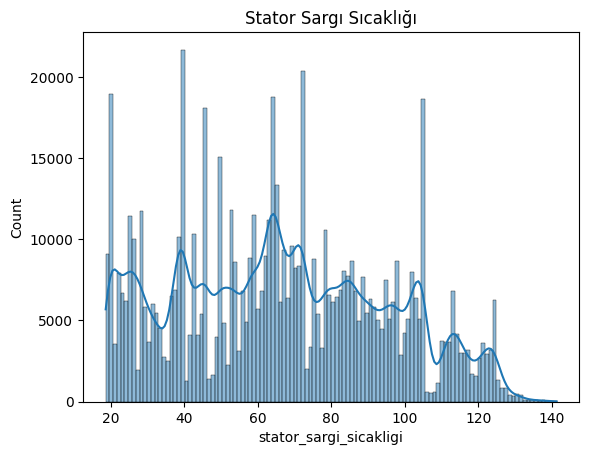

In [15]:
sns.histplot(dataFrame["stator_sargi_sicakligi"],kde=True)
plt.title("Stator Sargı Sıcaklığı")

# * Stator Diş Sıcaklığı-Histplot Grafiği

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Stator Diş Sıcaklığı Dağılımı')

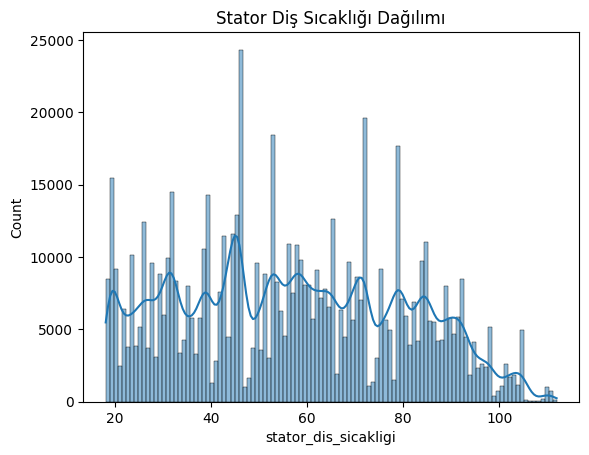

In [16]:
#Stator Diş Sıcaklığı Dağılım Grafiği
sns.histplot(dataFrame['stator_dis_sicakligi'], kde=True)
plt.title('Stator Diş Sıcaklığı Dağılımı')

# * Soğutma Suyu Sıcaklığı-Boxplot Grafiği

Text(0.5, 1.0, 'Soğutma Suyu Sıcaklığı Kutu Grafiği')

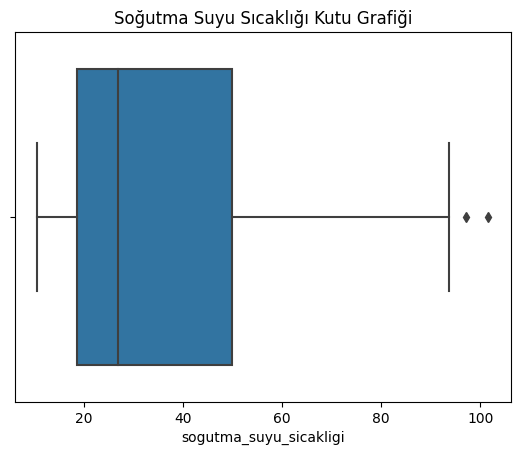

In [17]:
# Soğutma suyu sıcaklığı
sns.boxplot(x='sogutma_suyu_sicakligi', data=dataFrame)
plt.title('Soğutma Suyu Sıcaklığı Kutu Grafiği')

# * Voltaj D Bileşeni ve Mevcut Q Bileşeni Arasındaki Negatif İlişki-Scatterplot Grafiği

Text(0, 0.5, 'Mevcut Q Bileşeni')

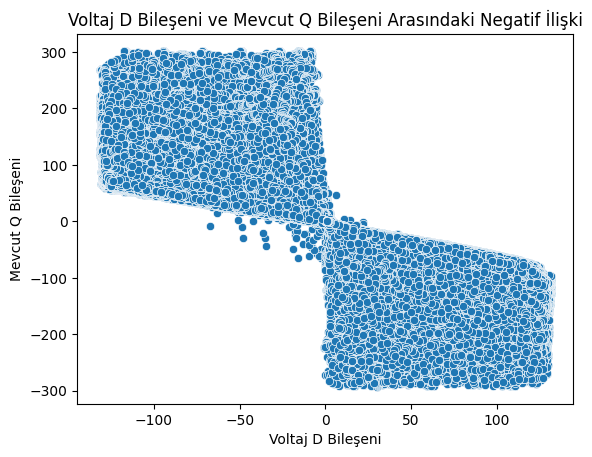

In [18]:
#Voltaj D Bileşeni ve Mevcut Q Bileşeni Arasındaki Negatif İlişki
sns.scatterplot(x='voltaj_d_bileseni', y='mevcut_q_bileseni', data=dataFrame)

plt.title('Voltaj D Bileşeni ve Mevcut Q Bileşeni Arasındaki Negatif İlişki')
plt.xlabel('Voltaj D Bileşeni')
plt.ylabel('Mevcut Q Bileşeni')

# * Motor Hızı ile Tork Arasındaki Korelasyon ve Görselleştirme

Motor Hızı ile Tork Arasındaki Korelasyon: -0.04372416887935014


Text(0, 0.5, 'Tork')

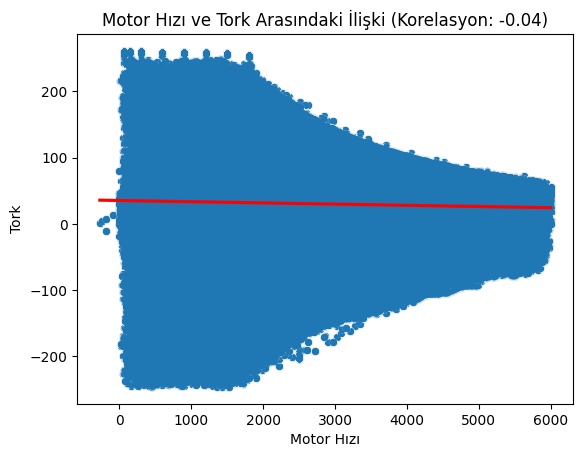

In [19]:
# Korelasyon hesaplama
corr_motor_tork = dataFrame['motor_hizi'].corr(dataFrame['tork'])
print(f"Motor Hızı ile Tork Arasındaki Korelasyon: {corr_motor_tork}")

# Korelasyon değeriyle birlikte görselleştirme

# Scatter plot ile görselleştirme
sns.scatterplot(x='motor_hizi', y='tork', data=dataFrame)

# Regresyon çizgisi 
sns.regplot(x='motor_hizi', y='tork', data=dataFrame, scatter_kws={'s': 10}, line_kws={'color': 'red'})

plt.title(f'Motor Hızı ve Tork Arasındaki İlişki (Korelasyon: {corr_motor_tork:.2f})')
plt.xlabel('Motor Hızı')
plt.ylabel('Tork')